Name: Arpan Das

Roll: 302211001012

Group: A2

Year: UG3

**Question:**

Write a Python program to solve the water-jug problem using breadth-first search. Inputs to the program should be 1. Capacity of two jugs, and target measurement. Target measurement is the unit user wants to get as a solution.


**Code:**

In [2]:
from collections import deque
from tabulate import tabulate

def water_jug_bfs(capacity_a, capacity_b, target_measurement):
    # Set to keep track of visited states to avoid revisiting the same state
    visited = set()
    # Queue to perform Breadth-First Search
    queue = deque([(0, 0, [['Initial state', 0, 0]])])

    while queue:
        # Dequeue the current state (current_a, current_b) and the state history 'state'
        current_a, current_b, state = queue.popleft()

        # Check if the current state has already been visited, if yes, skip it
        if (current_a, current_b) in visited:
            continue

        # Mark the current state as visited
        visited.add((current_a, current_b))

        # Check if the target measurement is achieved in either of the jugs
        if current_a == target_measurement or current_b == target_measurement:
            return state

        # Explore possible actions from the current state and add them to the queue

        # 1. Fill jug A and B to their capacities
        queue.append((capacity_a, current_b, state + [['Fill Jug A to capacity', capacity_a, current_b]]))
        queue.append((current_a, capacity_b, state + [['Fill Jug B to capacity', current_a, capacity_b]]))

        # 2. Empty jug A and B
        queue.append((0, current_b, state + [['Empty Jug A', 0, current_b]]))
        queue.append((current_a, 0, state + [['Empty Jug B', current_a, 0]]))

        # 3. Pour water from jug B to jug A
        pour_amount = min(current_b, capacity_a - current_a)
        queue.append((current_a + pour_amount, current_b - pour_amount, state + [['Pour water from B to A', current_a + pour_amount, current_b - pour_amount]]))

        # 4. Pour water from jug A to jug B
        pour_amount = min(current_a, capacity_b - current_b)
        queue.append((current_a - pour_amount, current_b + pour_amount, state + [['Pour water from A to B', current_a - pour_amount, current_b + pour_amount]]))

    # If the target_measurement is not reachable, return an empty list
    return []

if __name__ == "__main__":
    # Input the capacities of the jugs and the target measurement from the user
    capacity_a = int(input("Enter capacity of jug A: "))
    capacity_b = int(input("Enter capacity of jug B: "))
    target_measurement = int(input("Enter the target measurement: "))

    # Get the intermediate states to achieve the target measurement using BFS
    intermediate_states = water_jug_bfs(capacity_a, capacity_b, target_measurement)

    if intermediate_states:
        # If intermediate_states is not empty, print the intermediate states in a tabular format
        print()
        print("Intermediate states:")
        print()
        print(tabulate(intermediate_states, headers=['Action taken', 'Current state of Jug A', 'Current state of Jug B'], showindex="always", tablefmt="pretty"))
    else:
        # If the target measurement is not reachable, inform the user
        print()
        print("Target measurement is not reachable.")



Intermediate states:

+---+------------------------+------------------------+------------------------+
|   |      Action taken      | Current state of Jug A | Current state of Jug B |
+---+------------------------+------------------------+------------------------+
| 0 |     Initial state      |           0            |           0            |
| 1 | Fill Jug B to capacity |           0            |           3            |
| 2 | Pour water from B to A |           3            |           0            |
| 3 | Fill Jug B to capacity |           3            |           3            |
| 4 | Pour water from B to A |           4            |           2            |
+---+------------------------+------------------------+------------------------+


## Water Jug Problem Solver using Breadth-First Search (BFS)

### Description:

This Python script solves the classic Water Jug Problem using Breadth-First Search (BFS) algorithm. The Water Jug Problem involves two jugs, Jug A and Jug B, with certain capacities and a target measurement to be achieved by transferring water between the jugs. The goal is to find a sequence of actions to achieve the target measurement using the minimum number of steps.

### Requirements:

- Python 3.x
- `collections` module (for `deque`)
- `tabulate` module (for displaying results in a tabular format)

### Function: `water_jug_bfs`

This function takes the capacities of the two jugs (Jug A and Jug B) and the target measurement as input and returns a list of intermediate states (actions and current states of the jugs) to achieve the target measurement.

#### Parameters:

- `capacity_a` (int): The capacity of Jug A.
- `capacity_b` (int): The capacity of Jug B.
- `target_measurement` (int): The target measurement to be achieved.

#### Returns:

- `list`: A list of intermediate states in the format `[action, current_state_jug_a, current_state_jug_b]` that represent the sequence of actions taken to achieve the target measurement. If the target measurement is not reachable, an empty list is returned.

### Main Section:

The main section of the script prompts the user to input the capacities of Jug A and Jug B, as well as the target measurement. It then calls the `water_jug_bfs` function to get the intermediate states needed to achieve the target measurement. Finally, it displays the intermediate states in a tabular format using the `tabulate` module or informs the user if the target measurement is not reachable.

### Algorithm:

The algorithm used to solve the Water Jug Problem is Breadth-First Search (BFS). It explores all possible states reachable from the initial state (both jugs empty) and enqueues these states into a queue for further exploration. The BFS algorithm guarantees finding the shortest path to reach the target measurement.

### How it works:

1. The script initializes an empty set `visited` to keep track of visited states and a deque `queue` to store states for BFS exploration. The queue initially contains the initial state with both jugs empty.

2. The BFS algorithm starts by dequeuing the front state from the queue, representing the current state of Jug A and Jug B, and a state history that tracks the actions taken to reach this state.

3. The current state is checked if it has been visited before. If it has, the state is skipped to avoid revisiting it.

4. The current state is marked as visited.

5. The script checks if the target measurement is already achieved in either of the jugs. If yes, it returns the state history as the solution.

6. If the target measurement is not achieved, the script explores all possible actions from the current state and enqueues them into the queue for further exploration:

   - Fill Jug A and B to their capacities.
   - Empty Jug A and B.
   - Pour water from Jug B to Jug A until Jug A is full or Jug B is empty.
   - Pour water from Jug A to Jug B until Jug B is full or Jug A is empty.

7. Steps 3 to 6 are repeated until the queue becomes empty or the target measurement is achieved.

8. If the target measurement is not reachable, the function returns an empty list.

### Note:

The script uses the `tabulate` module to display the intermediate states in a tabular format for better visualization. Make sure to install the `tabulate` module using `pip install tabulate` before running the script.

#### Author:

This Python script was created by [Arpan Das].

**Output File:**

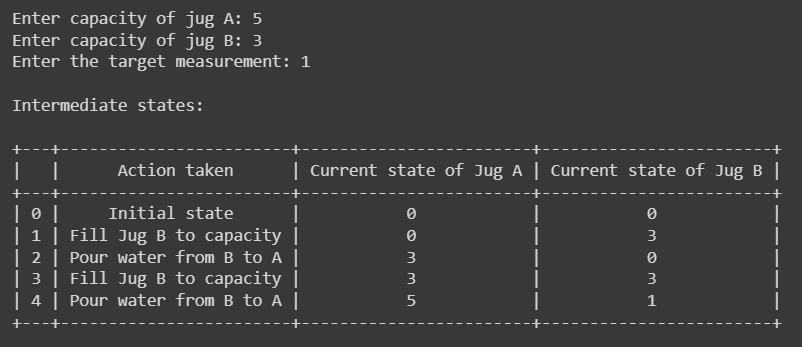